# Multiple Linear Regression

In [4]:
! pip install pandas
! pip install numpy

In [5]:

import pandas as pd  # Data manuplation
import numpy as np   # Numerical computation and storing a data in ndarray form
import matplotlib.pyplot as plt # Data plotting with graph and chart

In [6]:
df = pd.read_csv("FuelConsumption.csv")

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


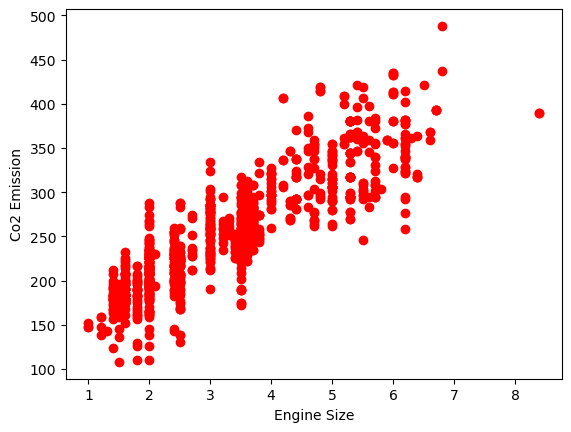

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

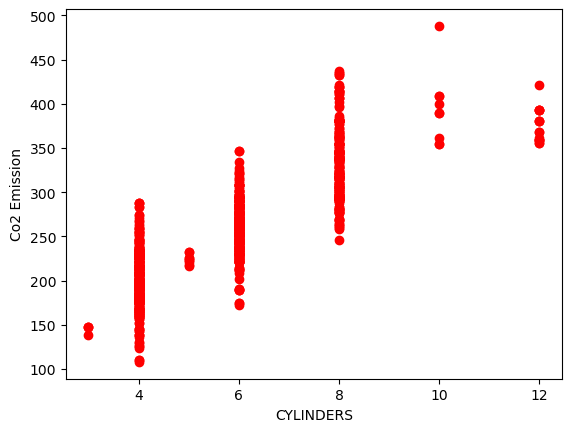

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("Co2 Emission")
plt.show()

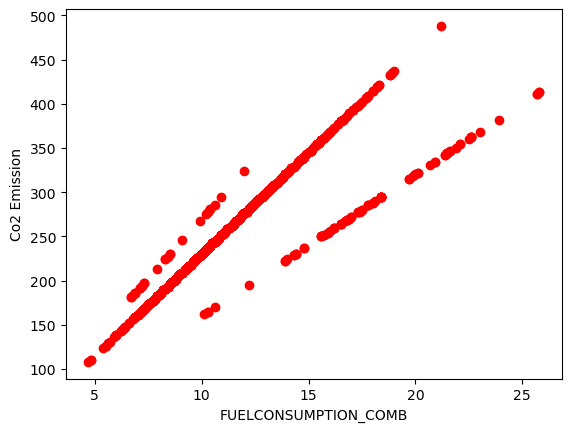

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Co2 Emission")
plt.show()

In [12]:
# Data processing
# 1. We have the whole data, split the data and keep some data for testing
x = cdf[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]] #IV
y = cdf[["CO2EMISSIONS"]]  #Label/DV

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 3)


In [13]:
# 2.We shall convert pandas data type to ndarray(numpy d dim array)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
# print(type(x_train))

In [14]:
# 3.Let's verify if the training and testing IV is same as of labels(DV)
print("Training dataset size [IV]", x_train.shape)
print("Training dataset size [DV]", y_train.shape)
print("Testing dataset size [IV]", x_test.shape)
print("Testing dataset size [DV]", y_test.shape)

Training dataset size [IV] (746, 3)
Training dataset size [DV] (746, 1)
Testing dataset size [IV] (321, 3)
Testing dataset size [DV] (321, 1)


In [15]:
# 4.Let's import regression model from linear model from sklearn
from sklearn import linear_model
regressor = linear_model.LinearRegression() # Created an object of linear regression 

In [16]:
# 5.Train the model(i.e regression model). This is done by using fit method in sklearn
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
# 6.The parameters/coefficient i.e. slope and intercept
# Simple LR = y=mx+c
# coefficient = m
print(regressor.coef_)   # Slope
print(regressor.coef_.shape)
print(regressor.coef_[0][0], regressor.coef_[0][1], regressor.coef_[0][2]) #Finding value of list at 0th index

[[12.34216943  6.24723795  9.6862707 ]]
(1, 3)
12.342169429676773 6.247237952855302 9.686270704629877


In [18]:
print(regressor.intercept_)
print(regressor.intercept_.shape)
print(regressor.intercept_[0])

[66.04052266]
(1,)
66.04052266441289


In [19]:
y_hat = regressor.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
print("Mean Absolute Error (Error in model):", mean_absolute_error(y_test, y_hat))
print("Mean Squared error (Error in model):", mean_squared_error(y_test, y_hat))
print("R2 Score (Accuracy of model):", r2_score(y_test, y_hat)*100, "%")

Mean Absolute Error (Error in model): 15.972165824584737
Mean Squared error (Error in model): 510.1254083499336
R2 Score (Accuracy of model): 86.68295013306641 %


In [22]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))